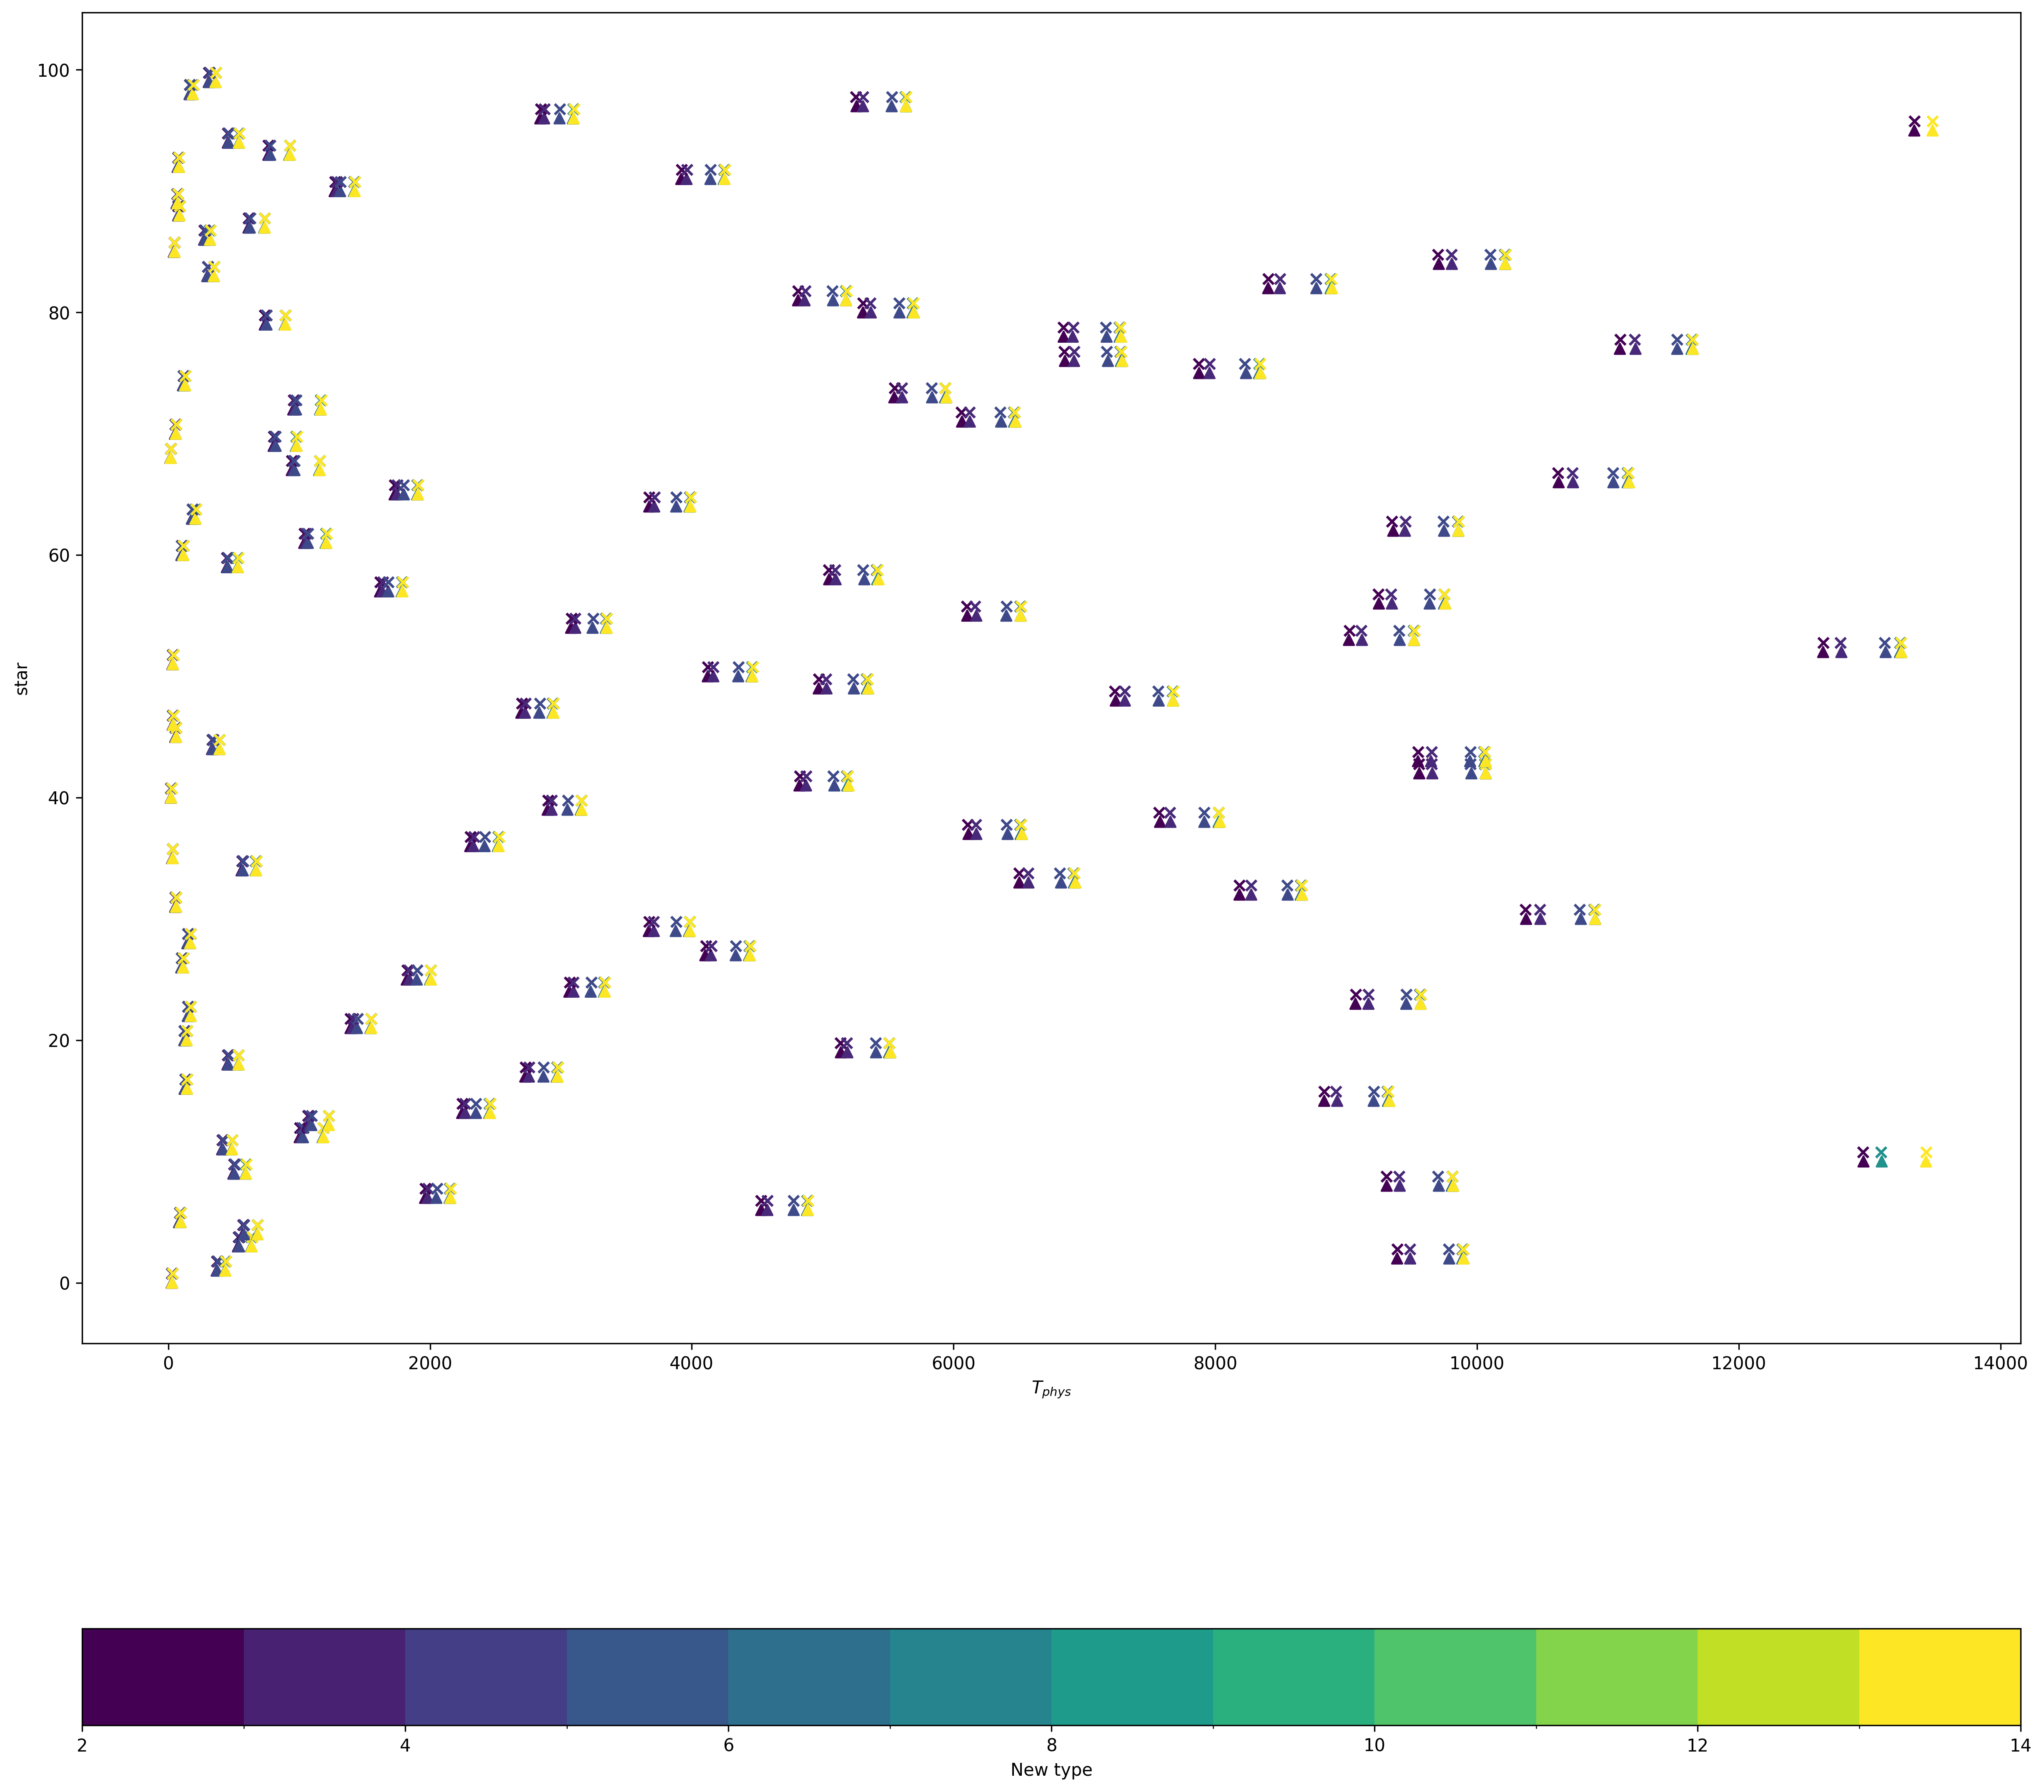

In [95]:
from IPython.display import display, Math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20, 40]
mpl.rcParams['figure.dpi'] = 300 #72
%matplotlib inline

def annotate_new_type(ax, data):
    pass

def load_new_type(fn):
    dtype = [('tphys', float), ('index', int), ('name', int), ('dm/m', float), ('kw0', int), ('kw', int), ('m0', float), ('m', float), ('r', float), ('emd', float)]
    data = np.loadtxt(fn, usecols=tuple(range(12, 22)), dtype=dtype)
    return np.sort(data, order='name')


def group_new_type(a):
    splt = np.unique(a['name'], return_index=True)[1][1:]
    grouped = np.split(a, splt)

    return {
        g[0]['name']: np.array([g['tphys'], g['kw']])
        for g in grouped
    }
    
    #tphys = np.split(a['tphys'], splt)
    #kw = np.split(a['kw'], splt)
    
    #return np.split(a, np.unique(a['name'], return_index=True)[1][1:])
    #return tphys, kw

    
runup = load_new_type('new_type-runup')
grunup = group_new_type(runup)#[3][0]


norunup = load_new_type('new_type-no-runup')
gnorunup = group_new_type(norunup)#[3][0]


keys = list(grunup.keys())[:100]

trunup = {k:grunup[k][0] for k in keys}
tnorunup = {k:gnorunup.get(k, [[np.ma.masked]])[0] for k in keys}

krunup = {k:grunup[k][1] for k in keys}
knorunup = {k:gnorunup.get(k, [[np.ma.masked]])[1] for k in keys}


#norunup = load_new_type('new_type-no-runup')

#runup = np.sort(runup, order='name')

fig, ax = plt.subplots(ncols=1)
fig.subplots_adjust(bottom=0.5)

ax.set_xlabel(r'$T_{phys}$')
ax.set_ylabel(r'star')

cm = mpl.colormaps['viridis']
i = 0
for k in keys:
    t = trunup[k]
    kw = krunup[k]
    name = [i]*len(t)
    ax.scatter(t, name, c=kw, marker='^', cmap=cm)

    t = tnorunup[k]
    kw = knorunup[k]
    name = [i+0.75]*len(t)
    ax.scatter(t, name, c=kw, marker='x', cmap=cm)

    i += 1


bounds = list(range(2, 15))
norm = mpl.colors.BoundaryNorm(bounds, cm.N)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cm), ax=ax, location='bottom', label='New type')



